In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Anantapur.csv")

In [ ]:
df.head()

,STATE,DISTRICT,QTR,YR,NSP Male/ NewMicConfMale,NSP Female/ NewMicConf Female,NSP Total/ NewMicConf Total,Relapse Male,Relapse Female,NSN Male/NewClinDiag Male,NSN Female/NewClinDiag Female,NEP Male,NEP Female,0-14 yrs NSP(NewAll207+) Male,0-14 yrs NSP(NewAll207+) Female,15-24 yrs NSP(NewAll207+) Male,15-24 yrs NSP(NewAll207+) Female,25-34 yrs NSP(NewAll207+) Male,25-34 yrs NSP(NewAll207+) Female,35-44 yrs NSP(NewAll207+) Male,35-44 yrs NSP(NewAll207+) Female,45-54 yrs NSP(NewAll207+) Male,45-54 yrs NSP(NewAll207+) Female,55-64 yrs NSP(NewAll207+) Male,55-64 yrs NSP(NewAll207+) Female,65 & above yrs NSP(NewAll207+) Male,65 & above yrs NSP(NewAll207+) Female,SumOfHIV_Tested,SumOfHIV_infected
0,Andhra Pradesh,ANANTAPUR,1,2008,529,181,710,82,12,319,132,105,73,2.0,3.0,64.0,46.0,89.0,49.0,98.0,32.0,118.0,30.0,105.0,16.0,53.0,5.0,199.0,50.0
1,Andhra Pradesh,ANANTAPUR,2,2008,524,204,728,70,21,201,129,89,84,2.0,9.0,63.0,46.0,79.0,49.0,100.0,45.0,118.0,24.0,104.0,23.0,58.0,8.0,170.0,68.0
2,Andhra Pradesh,ANANTAPUR,3,2008,502,162,664,75,15,179,112,91,73,1.0,4.0,63.0,20.0,76.0,50.0,107.0,35.0,108.0,28.0,102.0,18.0,45.0,7.0,263.0,73.0
3,Andhra Pradesh,ANANTAPUR,4,2008,481,194,675,55,22,193,113,90,62,0.0,3.0,57.0,50.0,70.0,46.0,86.0,41.0,116.0,21.0,78.0,21.0,74.0,12.0,369.0,72.0
4,Andhra Pradesh,ANANTAPUR,1,2009,527,195,722,73,14,249,127,94,73,4.0,6.0,50.0,42.0,104.0,51.0,94.0,32.0,109.0,34.0,102.0,25.0,64.0,5.0,605.0,109.0


In [ ]:
raw_seq = df['NSP Total/ NewMicConf Total']

In [ ]:
raw_seq

0     710
1     728
2     664
3     675
4     722
5     703
6     645
7     564
8     613
9     729
10    630
11    628
12    641
13    643
14    588
15    585
16    601
17    577
18    495
19    541
20    626
21    603
22    437
23    590
24    627
25    671
26    599
27    551
28    539
29    632
30    500
31    598
32    654
33    646
34    580
35    651
36    626
37    723
38    547
39    550
40    560
41    775
42    669
43    757
Name: NSP Total/ NewMicConf Total, dtype: int64

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [ ]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
n_steps = 8

In [ ]:
X, y = split_sequence(raw_seq, n_steps)

In [ ]:
n_features = 1

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X, y, epochs=1000, verbose=0)

In [ ]:
resArray = list(X[-1])

In [ ]:
for i in range(0 , 24):
  abc = resArray[i:i+8]
  x_input = array(abc).astype('float32')
  x_input = x_input.reshape((1, n_steps, n_features))
  resArray.append(model.predict(x_input, verbose=0))


In [ ]:
resArray

[array([651]),
 array([626]),
 array([723]),
 array([547]),
 array([550]),
 array([560]),
 array([775]),
 array([669]),
 array([[722.40106]], dtype=float32),
 array([[778.87006]], dtype=float32),
 array([[651.75806]], dtype=float32),
 array([[544.67303]], dtype=float32),
 array([[678.8515]], dtype=float32),
 array([[709.249]], dtype=float32),
 array([[800.9693]], dtype=float32),
 array([[647.97174]], dtype=float32),
 array([[671.9367]], dtype=float32),
 array([[702.83984]], dtype=float32),
 array([[734.7544]], dtype=float32),
 array([[656.745]], dtype=float32),
 array([[654.76324]], dtype=float32),
 array([[724.23865]], dtype=float32),
 array([[707.0778]], dtype=float32),
 array([[613.35376]], dtype=float32),
 array([[618.6506]], dtype=float32),
 array([[681.85767]], dtype=float32),
 array([[680.41064]], dtype=float32),
 array([[618.6273]], dtype=float32),
 array([[627.8301]], dtype=float32),
 array([[636.0207]], dtype=float32),
 array([[642.02966]], dtype=float32),
 array([[579.2543]]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
range1 = pd.date_range(start='1/1/2008', periods=44, freq='Q')

In [ ]:
range2 = pd.date_range(start='1/1/2019', periods=24, freq='Q')

In [ ]:
range2

DatetimeIndex(['2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
               '2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31',
               '2024-03-31', '2024-06-30', '2024-09-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

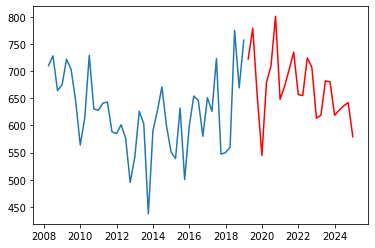

In [ ]:
plt.plot(range1 , raw_seq)
plt.plot(range2 , res , 'r')

In [ ]:
output = resArray[8:]

In [ ]:
output = array(output)

In [ ]:
res = output.flatten()

In [ ]:
res

array([736.48193, 707.3424 , 698.1117 , 680.513  , 662.3854 , 648.72766,
       632.0849 , 617.47034, 602.8616 , 588.37823, 574.6117 , 560.9253 ,
       547.72614, 534.805  , 522.21344, 509.95047, 497.98157, 486.32257,
       474.9517 , 463.86774, 453.0622 , 442.5274 , 432.25757, 422.24542],
      dtype=float32)